# Stori Data Science Challenge

The present document is a Challenge proposed by Stori. The tasks to be completed are the following:

1. Question 1
     1. Plot an histogram of the balance amount for all the customers.
     2. Report any structure you find and any hypotheses you have about that structure.
     3. Report mean and median balance, grouped by year and month of activated_date .
2. Question 2
    1. Report in a table the following information for customers who activated their account and made their last payment during 2020: cust_id (excluding letters), activated_date (in format YYYY-MM), last_payment_date (in format YYYY-MM-DD), cash_advance , credit_limit , and acalculated field of cash_advance as a percentage of credit_limit.
3. Question 3
    1. Build a predictive model for fraud.
    2. What explanatory variable was the most powerful predictor for fraud?

The dataset analyzed comes from the CSV file <strong>df (1) (1) (2).csv</strong>

The following sections cover the step by step procedure performed to try answering the questions from the challenge.
***
## Question 1

### Importing libraries

First, the required libraries must be imported.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd


###  Reading the CSV

Pandas, allows become the CSV file in a Data Frame object that simplifies the data interaction.

In [2]:
credit_df = pd.read_csv('df (1) (1) (2).csv')

### Ploting Histograma

With the <em>hist</em> plot the histogram to visualize the frequency of the different  values for <em>balance</em>.

array([[<AxesSubplot:title={'center':'balance'}>]], dtype=object)

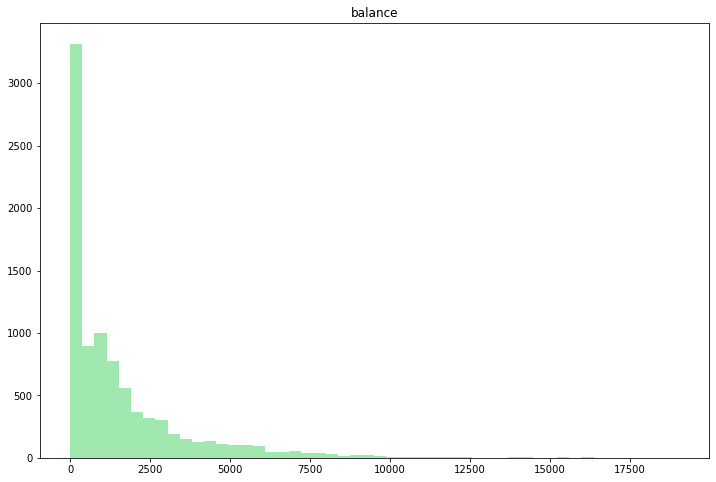

In [3]:
credit_df.hist(column ='balance', bins = 50 , grid = False, figsize = (12,8), color = '#A0E8AF')

According with the graph above. It could be said that most of the people have a balance in theirs accounts equal to 0 or nearly to 0.

### Reporting mean and median

The following code, give us as output the mean and median of the balance in each different month cover in the dataset (Octuber/2019 to July/2020).

It is needed to change the type data of the date to facilitate the data manipulation. The code works with two nested <em>for</em> to iterate with years and months, in that way the code has the possibility to calculate the mean and median for each different month in the dataset.

In [4]:
credit_df['activated_date'] = pd.to_datetime(credit_df['activated_date'], format = '%Y-%m-%d')
months = {1: 'January', 2: 'February', 3: 'March', 4 : 'April', 5: 'May', 6 : 'June', 7: 'July', 8: 'August', 9: 'September', 10 : 'October', 11: 'November', 12: 'December'}
for year in (2019, 2020):
    if year == 2020:
        initial_month = 1
        final_month = 8
    if year == 2019:
        initial_month = 10
        final_month = 13
    for month in range(initial_month,final_month):
        if month < 12:
            month_activ_df = credit_df.loc[(credit_df['activated_date'] >= '{year}-{month}-1'.format(year = year, month = month))
                                       & (credit_df['activated_date'] < '{year}-{month}-1'.format(year = year, month = month + 1))]
        elif month == 12:
            month_activ_df = credit_df.loc[(credit_df['activated_date'] >= '{year}-{month}-1'.format(year = year, month = month))
                                       & (credit_df['activated_date'] < '{year}-{month}-1'.format(year = year + 1, month = 1))]
        
        mean = month_activ_df['balance'].mean()
        median = month_activ_df['balance'].median()
        print('{month}, {year}: \n\t mean: {mean}\n\t median: {median}'.format(month = months.get(month), year = year, mean = mean, median = median))

October, 2019: 
	 mean: 2482.234166470952
	 median: 1524.409377
November, 2019: 
	 mean: 1848.7043227127883
	 median: 1082.071173
December, 2019: 
	 mean: 2018.7889055277137
	 median: 1162.5883840000001
January, 2020: 
	 mean: 1854.5358888816236
	 median: 1175.749847
February, 2020: 
	 mean: 1747.350977283721
	 median: 994.841733
March, 2020: 
	 mean: 1554.9730231185345
	 median: 828.9548235
April, 2020: 
	 mean: 1483.1831911315194
	 median: 910.1419125
May, 2020: 
	 mean: 1214.333732252146
	 median: 734.5576815
June, 2020: 
	 mean: 939.9979956235698
	 median: 472.7918625
July, 2020: 
	 mean: 649.7176221283138
	 median: 221.29129


According with the past values, it could be seen a tendency  decreasing of the mean balance of new clients
***
## Question 2

The following procedure is implemented to get the table as required:

* Select only the registers where the activated_date and last_payment_date are after the 2019, using the <em>loc</em> method with the same condition for both dates.
* Create a copy of the Data Frame to avoid getting warnings.
* Strip 'C' from all customers ID's using <em>str.strip</em> method.
* Modify format for <em>activated_date</em> to show only year and month.
* <em>last_payment_date</em> does not change the format but it is needed formatted as date data.
* Eliminate by using two <em>drop</em> method callings to eliminate undesired columns.
* Generate new column called <em>percentage</em> that calculate the percentage of cash_advance as a percentage of credit_limit.



In [5]:
act_last_2020_df = credit_df.loc[(credit_df['activated_date'] > '2019-12-31') & (credit_df['last_payment_date'] >= '2019-12-31')]
act_last_2020_df = act_last_2020_df.copy()
act_last_2020_df['cust_id'] = act_last_2020_df['cust_id'].str.strip('C')
act_last_2020_df['activated_date'] = act_last_2020_df['activated_date'].dt.strftime('%Y-%m')
act_last_2020_df['last_payment_date'] = pd.to_datetime(act_last_2020_df['last_payment_date'], format = '%Y-%m-%d')
act_last_2020_df = act_last_2020_df.drop(columns = ['balance', 'balance_frequency', 'purchases', 'oneoff_purchases', 
                                                    'installments_purchases', 'purchases_frequency', 'oneoff_purchases_frequency' , 
                                                    'purchases_installments_frequency', 'cash_advance_frequency', 'cash_advance_trx', 
                                                    'purchases_trx', 'payments', 'minimum_payments', 'prc_full_payment', 'tenure', 'fraud'])
act_last_2020_df = act_last_2020_df.drop("Unnamed: 0",axis=1)
act_last_2020_df['percentage'] = (act_last_2020_df['cash_advance'] * 100 ) /act_last_2020_df['credit_limit']
act_last_2020_df.head(12)

,cust_id,activated_date,last_payment_date,cash_advance,credit_limit,percentage
2633,12709,2020-01,2020-05-08,2431.292076,8000.0,30.391151
2634,12710,2020-01,2020-05-26,0.000000,2000.0,0.000000
2635,12712,2020-01,2020-10-20,0.000000,3000.0,0.000000
2636,12713,2020-01,2020-08-22,0.000000,9000.0,0.000000
2637,12714,2020-01,2020-04-26,78.763096,1500.0,5.250873
2638,12715,2020-01,2020-10-16,0.000000,4000.0,0.000000
2639,12716,2020-01,2020-05-06,2260.735690,9000.0,25.119285
2640,12717,2020-01,2020-08-13,611.974158,3500.0,17.484976
2641,12718,2020-01,2020-08-28,0.000000,9000.0,0.000000
2642,12719,2020-01,2020-07-15,4200.991254,9000.0,46.677681


As the dataset contains many rows, only the first 12 elements are showed in the table above.

***
## Question 3

The hypothesis to find a patron of behavior is that <strong>The accounts that were part of a fraud have the tendency of have an amount of <em>balance</em> low (BALANCE : Balance amount left in their account to make purchases) and high <em>purchases_trx</em> (PURCHASESTRX : Number of purchase transactions made)</strong>

In order to investigate the mentioned points the method to be performed is:

- Find the mean of the <em>Balance</em> and the mean of <em>Purchases_trx</em> for accounts that suffered fraud (Fraud = 1)
- Find the mean of the <em>Balance</em> and the mean of <em>Purchases_trx</em> for accounts that did not suffer fraud (Fraud = 0)
- Made histograms for accounts with fraud and with not fraud.
- Compare both results versus the hypothesis.

### Getting mean of <em>Balance</em> and <em> Purchases_trx</em>

The original DataFrame is splited in two Dataframes based in the <em>Fraud</em> value. After that both mean can be gotten.



In [6]:
credit_df_fraud_1 = credit_df.loc[(credit_df['fraud'] == 1)]
credit_df_fraud_0 = credit_df.loc[(credit_df['fraud'] == 0)]
mean_balance_fraud = credit_df_fraud_1['balance'].mean()
mean_purchase_trx_fraud = credit_df_fraud_1['purchases_trx'].mean()
mean_balance_not_fraud = credit_df_fraud_0['balance'].mean()
mean_purchase_trx_not_fraud = credit_df_fraud_0['purchases_trx'].mean()
print('The means for accounts that suffered fraud are:\n\tBalance: {balance}\n\tPurchase transactions: {purchase}'.format(balance =mean_balance_fraud, purchase = mean_purchase_trx_fraud))
print('The means for accounts that did not suffer fraud are:\n\tBalance: {balance}\n\tPurchase transactions: {purchase}'.format(balance =mean_balance_not_fraud, purchase = mean_purchase_trx_not_fraud))


The means for accounts that suffered fraud are:
	Balance: 6329.680703214286
	Purchase transactions: 101.61428571428571
The means for accounts that did not suffer fraud are:
	Balance: 1527.0418695830142
	Purchase transactions: 14.024774774774775


### Ploting Histrograms

The following lines plot histograms that show which values of Purchases transaction repeat more on each pair of DataFrames, "Fraud" in red and "not Fraud" in aqua blue.

 

array([[<AxesSubplot:title={'center':'purchases_trx'}>]], dtype=object)

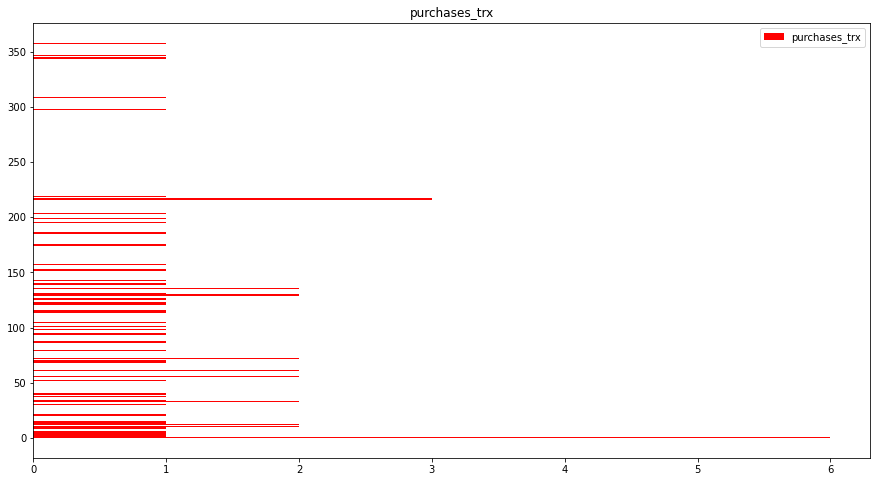

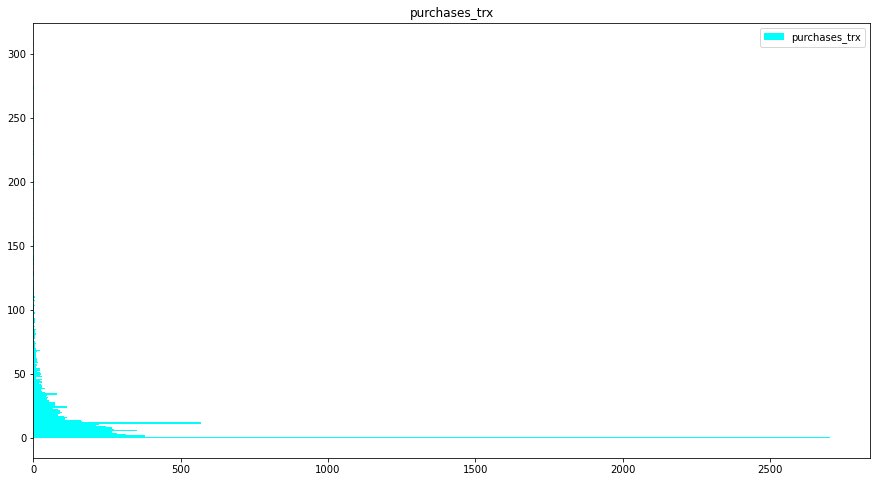

In [7]:
credit_df_fraud_1.hist(column ='purchases_trx', bins = 300 , grid = False, color = '#FE0101', legend = True, orientation = 'horizontal', figsize=(15, 8))
credit_df_fraud_0.hist(column ='purchases_trx', bins = 300 , grid = False, color = '#01FEFA', legend = True, orientation = 'horizontal', figsize=(15, 8))


### Conclusion

According with the results obtained in the code above, the conclusions are:
 * It could be said, the balance is not an indicator of fraud because it does not decrease significantly  with the presence of Fraud
 * According with the prom in the quantity of purchases, it could be concluded that the Purchases transaction increase significantly with the presence of fraud.
 * Finally, the "Purchases transaction" is an indicator for fraud, so when an account increases the quantity of "Purchases transaction" rapidly is time to take action in order to avoid more damage to that particular account.
 ***
 Thank you for your time and the opportunity.
 Author: Eduardo Reyes Galván
 e-mail: eduardoreyesgalvan@gmail.com